## Chapter:  Gentle Intro

The iris dataset

50 observations of 4 numeric varialbes for 3 species of iris

In [1]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [2]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width          Species  
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100   setosa    :50  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300   versicolor:50  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300   virginica :50  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199                  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800                  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500                  

## Classification, Regression, Clustering

* **Classification**
    * goal: predict category of new observation
        * earlier observation -> estimate ->  Classifier
        * Unseen Data  -> Classifer -> Class
    * Examples:
        * Medical diagnosis
        * Animal Recognition (cats, dogs)
    *  Qualitative Ouput, Predefined Classes
    
* **Regression**
    * goal : predict a continuous value of response from continuous values of predictors variables
        * e.g. relation weight - height linear
        * height = B0 +B1 * weight
    * Examples: 
        * predict credit scores based of previous payments
        * grades -> landing a job
    * Quantitative output
* **Clustering**
    * grouping objects in clusters
        * similar within cluster
        * dissimilar between clusters
    * Example grouping similar animal photos
        * no labels, no right or wrong, plenty possible clustering 
    * e.g. k-means   will cluster on k clusters based on similarity measure
    

            
species       1  2  3
  setosa     50  0  0
  versicolor  0  2 48
  virginica   0 36 14

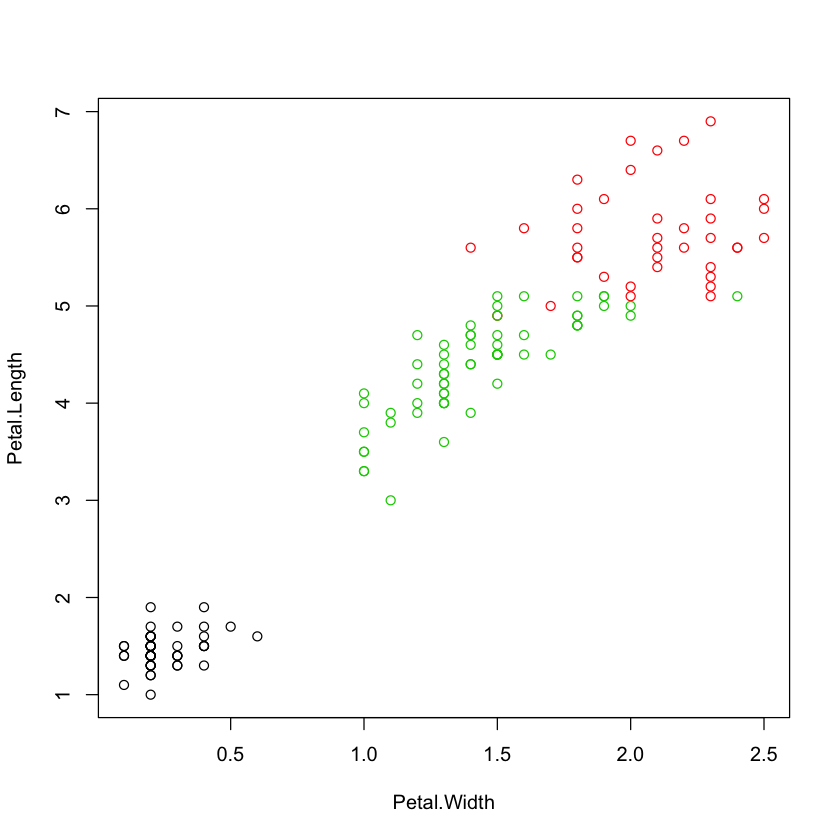

In [3]:
## example of k-means clustering on iris dataset
set.seed(1)
my_iris <- iris[-5] # chop out the factor Species column
species <- iris$Species #keep the column with factors
kmeans_iris <- kmeans(my_iris, 3) # k-means clustering
table(species, kmeans_iris$cluster)
plot(Petal.Length ~ Petal.Width, data = my_iris, col = kmeans_iris$cluster)

## Supervised vs Unsupervised

 * Superviced learning.  labeled observations are availale to the algorithm during training
 * Unsupervised learning.  do not require labeled data
     * e.g. clustering technique
     
 ### Performance of the model
 
  * Supervized learning
     * compare real labels with predicted labels
     * predicted values should be similar to real labels
        
    * Unsupervized learning:
       * no labeled data to compare to
       * techniques will be seen in the course
        
### Semi-Supervized learning

 * lots of unlabeled observation and few labeled
 * group similar observation using clustering
 
      
  
  

In [4]:
##decision tree example on siris
require(rpart)
set.seed(1)
tree <- rpart(Species ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width, 
              data = iris, method = "class")
# Add a dataframe containing unseen observations
unseen <- data.frame(Sepal.Length = c(5.3, 7.2), 
                     Sepal.Width = c(2.9, 3.9), 
                     Petal.Length = c(1.7, 5.4), 
                     Petal.Width = c(0.8, 2.3))
# Predict the label of the unseen observations
predict(tree, unseen, type="class")

Loading required package: rpart


1         2 
   setosa virginica 
Levels: setosa versicolor virginica

       wt              hp       
 Min.   :1.513   Min.   : 52.0  
 1st Qu.:2.581   1st Qu.: 96.5  
 Median :3.325   Median :123.0  
 Mean   :3.217   Mean   :146.7  
 3rd Qu.:3.610   3rd Qu.:180.0  
 Max.   :5.424   Max.   :335.0  

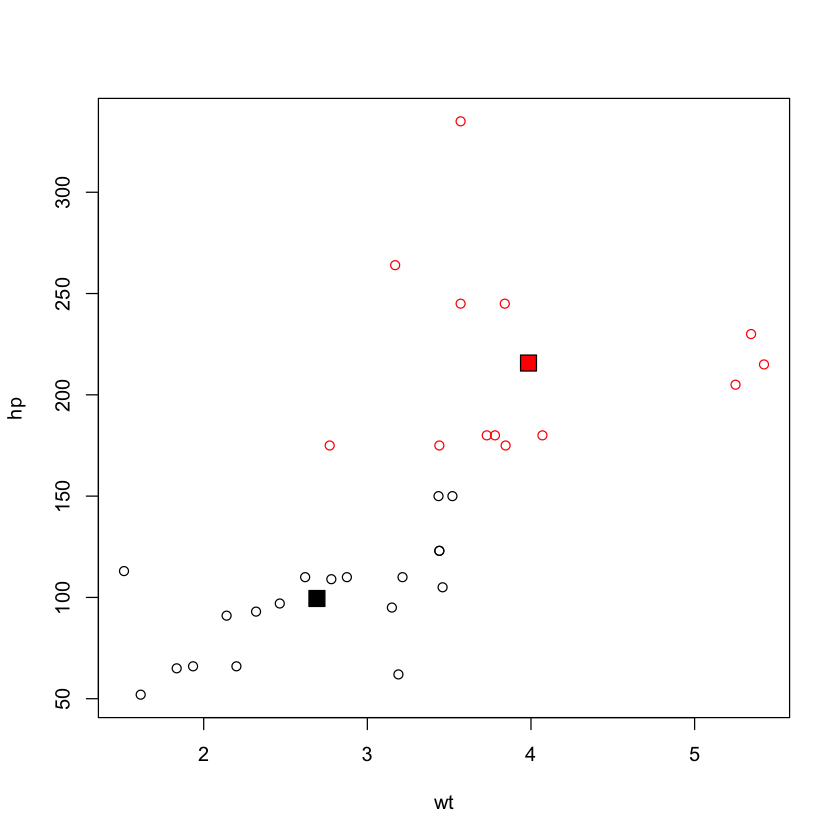

In [5]:
cars <- data.frame(mtcars[6],mtcars[4])
summary(cars)
km_cars <- kmeans(cars, 2)
#km_cars$cluster # print clusters
plot(cars, col=km_cars$cluster) # print two clusters
#add centers of clusters
points(km_cars$centers, pch = 22, bg = c(1, 2), cex = 2)

## Chapter: Performance of a model

* Accuracy
* Computation time
* Interpretabiity

3 types of tasks

* Classification
* Regression
* Clustering

Accuraccy (correctly classified / total number of classified )

#### Confusion matrix for classification
 

 
|     | | prediction    |
|-----|-|---------------|
|     | | P     |  N    |
|Truth|P| TrueP | FalseN|
|     |N| FalseP| TrueN |
 
$$ Accuracy = \frac{TP+TN}{TP+TN+FP+FN} $$
$$ Precision = \frac{TP}{TP+FP} $$
$$ Recall = \frac{TP}{TP+FN} $$

#### RMSE for Regression

* Root mean Squared Error RMSE
    * (squared sum of residuals)
$$ RMSE = \sqrt{\frac{1}{N}\sum^N_{i=1} (y_i -\hat{y}_i)^2 } $$

#### Clustering
 * Similarity within each cluster
 * Similarity between clusters
 
 * Dunn's index   minimum interclaster distance / maximal diameter

In [6]:
# make a confusion matrix on a titanic dataset
set.seed(1)
# dataset about rate of survival based on few features
titanic<-read.csv(file="titanic.csv", row.names=1,header=TRUE
				,colClasses=c("numeric", "factor", "numeric", "factor", "numeric") )
titanic$Survived <- factor(titanic$Survived, levels=c("1", "0")) #arrange factor levels
# A decision tree classification model is built on the data
tree <- rpart(Survived ~ ., data = titanic, method = "class") #survived response, predictors all others
pred<-predict(tree, titanic, type='class') #survival predicted by model
conf<-table(titanic$Survived, pred ) # make a confusion matrix
conf

   pred
      1   0
  1 212  78
  0  53 371

In [7]:
### compute accuracy, precision and recall
TP <- conf[1,1] 
FN <- conf[1,2] 
FP <- conf[2,1] 
TN <- conf[2,1] 

accuracy <- (TP + TN) / (TP+FN+FP+TN)
print(paste("accuracy",accuracy))
precision <- TP/ (TP + FP)
print(paste("precision", precision)) 
recall <- TP / (TP + FN)
print(paste('recall',recall)) 

[1] "accuracy 0.669191919191919"
[1] "precision 0.8"
[1] "recall 0.731034482758621"


[1] "WSS/BSS 0.276284625418552"


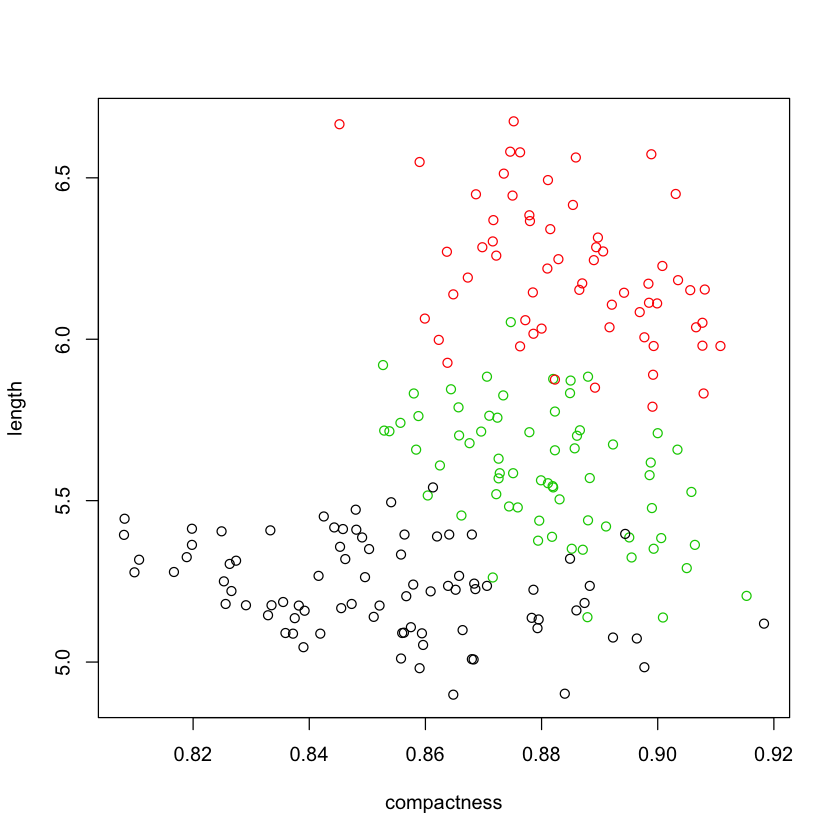

In [8]:
## clustering evaluaate a ratio of within sum of squares to the between cluster
set.seed(1)
seeds <- read.csv(file='seeds.csv', row.names=1, header=T)
km_seeds <- kmeans(seeds, 3)
plot(length ~ compactness, data = seeds, col=km_seeds$cluster)
print(paste('WSS/BSS' , km_seeds$tot.withinss / km_seeds$betweenss))
# low value of within SS / between SS shows a good measure of clustering
# clusters are well separated

### Training set and test sets

* Predictive power  vs descriptive power

* Supervised learning: model must predict unseen observation
* Classical statistics: model must help to explain or describe data and its relations

#### Training sets and Test sets  for supervised learning
* Split the dataset
* training and test are disjoint sets
* not relevant for unsupervized learning

#### effect of sampling 
* splitting train/test dataset can have consequences
* cross-validation,  e.g. 4-fold cross-validation

In [9]:
## how to do train/set split (titanic dataset) 0.7/0.3
set.seed(1)
n <- nrow(titanic) #number of observations
shuffled <- titanic[sample(n),] #shuffle the dataset
# Split the data in train and test
pct_split<-0.7
train_indices <- 1:round(pct_split * n)
train <- shuffled[train_indices, ]
test_indices <- (round(pct_split * n) + 1):n
test <- shuffled[test_indices, ] #the rest of the dataset

In [10]:
#apply  the classification model but on the training set
tree <- rpart(Survived ~ ., train, method = "class")
# Predict the outcome on the test set with tree:
pred<-predict(tree, test, type='class')
# Calculate the confusion matrix: conf
conf<-table(test$Survived, pred)
print(conf)
print(paste("accuracy:" , sum(diag(conf))/sum(conf) ))

   pred
      1   0
  1  47  38
  0   5 124
[1] "accuracy: 0.799065420560748"


In [11]:
## cross validation on 6 runs 
npass <- 6
accs <- rep(0,6) # a vec of accurencies
n<- nrow(shuffled)
for (i in 1:6) {
  # the trick is to correctly define a moving window of indices of a test set
  indices <- (( (i-1) * round((1/npass)*n)) + 1):((i*round((1/npass) * n)))
  test <- shuffled[indices,] #indices are indexesof test set
  train <- shuffled[-indices,] #train is the rest
  tree <- rpart(Survived ~ ., train, method = "class")
  pred<-predict(tree, test, type='class')  
  conf<-table(test$Survived, pred)
  accs[i] <- sum(diag(conf))/sum(conf)
}
print(paste("cross validation on 6 runs " ,mean(accs)))
#observe a high value of accuracy from cross-validation
print(sd(accs)) #and a low value of standard deviation

[1] "cross validation on 6 runs  0.801120448179272"
[1] 0.01265164


### Bias and Variance
* Irreducible error
    * noise (don't minimize)
* Reducible Error
    * is split itno bias and variance
    
**Bias**  
* Error due to biase: wrong assumptions when specifying algorithm
    * difference between predictions and truth
* Example, fit data on a quadratic line by a liner regression with assumption that data is linear
    * Error due to bias is high because we are restricting our model
* The more you restrict your model, the higher is the bias    

**Variance**
* Error due to the sampling of the training set
* model with high variance fits training set closely
* Example, fit quadratic data with a high degree polynomial
    * the trining set is fitted perfectly
    * but if you change a training set, the model will change completely
* high variance: generalizes bad to test set

#### Bias Variance trade-off
* find the balance with bias and variance

**Overfitting**
* accuracy will depend on a dataset split (train/test)
* model fits training set a lot better than test set
* too specific

**Underfitting**
* Restricting your model too much
* High bias
* too general


###  Example spam or not
* features: number of capital letters (many = spam) and number of exclamation marks (many = spam)
* 1 email in the training set with 50 capital letters and 30 ! is not a spac (it is an exception)

     * overfitted model ( > 45 capital lettres  AND > 25  exclamations marks  OR not ( 50 capital lettrs and 30 exclamation marks )  is spam
         * it is too specific
         
     * underfitted model ( > 10 capital letters )  is spam.
         * This is a too general model      


In [12]:
### check the performance of classifier on two emails data sets
emails_small <- read.csv(file='emails_small.csv', header=T, row.names=1,colClasses=c('numeric','numeric','factor') )
emails_small$spam <- factor(emails_small$spam, levels=c("1", "0")) #rearrange factor levels
spam_classifier <- function(x){
  prediction <- rep(NA,length(x))
  prediction[x > 4] <- 1
  prediction[x >= 3 & x <= 4] <- 0
  prediction[x >= 2.2 & x < 3] <- 1
  prediction[x >= 1.4 & x < 2.2] <- 0
  prediction[x > 1.25 & x < 1.4] <- 1
  prediction[x <= 1.25] <- 0
  return(factor(prediction, levels=c("1","0")))   ## how levels values are defined is imported
}

pred_small<-spam_classifier(emails_small$avg_capital_seq) #apply spam classifier
conf_small<-table(emails_small$spam, pred_small) #confusion matrix
print(conf_small) #confusion matrix
acc_small <- sum(diag(conf_small))/sum(conf_small)
print(paste("accuracy for emails_small", acc_small)) #accuracy for emails set is 100%
#such perfect accuracy is probably an overfit

   pred_small
    1 0
  1 5 0
  0 0 8
[1] "accuracy for emails_small 1"


In [13]:
### now check this classifer on much bigger set
emails_full <- read.csv(file='emails_full.csv', header=T, row.names=1,colClasses=c('numeric', 'numeric', 'factor') )
emails_full$spam <- factor(emails_full$spam, levels=c("1", "0")) #rearrange factor levels

pred_full<-spam_classifier(emails_full$avg_capital_seq) #apply previoius spam_classifer
conf_full<-table(emails_full$spam, pred_full)
print(conf_full) #confusion matrix
acc_full <- sum(diag(conf_full))/sum(conf_full)
print(paste("accuracy for emails_full",acc_full)) #accuracy for emails_full

   pred_full
       1    0
  1 1123  690
  0  892 1896
[1] "accuracy for emails_full 0.656161703977396"


In [14]:
### now repeat  indroducing bias to the model 
#simplify the classifier (making it more general)
spam_classifier <- function(x){
  prediction <- rep(NA,length(x))
  prediction[x > 4] <- 1
  prediction[x <= 4 ] <- 0
  return(factor(prediction, levels=c("1","0")))
}
#emails_small
conf_small <- table(emails_small$spam, spam_classifier(emails_small$avg_capital_seq))
print(conf_small)
acc_small <- sum(diag(conf_small)) / sum(conf_small)
print(paste('accuracy',acc_small))
#emails_full
conf_full <- table(emails_full$spam, spam_classifier(emails_full$avg_capital_seq))
print(conf_full)
acc_full <- sum(diag(conf_full)) / sum(conf_full)
print(paste('accuracy',acc_full))
## by introducing bias we have improved the accuracy on a larger dataset by 7%

   
    1 0
  1 2 3
  0 0 8
[1] "accuracy 0.769230769230769"
   
       1    0
  1  777 1036
  0  225 2563
[1] "accuracy 0.725929145837861"


In [7]:
sessionInfo()

R version 3.3.0 (2016-05-03)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 10586)

locale:
[1] LC_COLLATE=English_United States.1252 
[2] LC_CTYPE=English_United States.1252   
[3] LC_MONETARY=English_United States.1252
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.1252    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] R6_2.1.2        magrittr_1.5    IRdisplay_0.3   pbdZMQ_0.2-2   
 [5] tools_3.3.0     base64enc_0.1-3 uuid_0.1-2      stringi_1.0-1  
 [9] IRkernel_0.6    jsonlite_0.9.20 stringr_1.0.0   digest_0.6.9   
[13] repr_0.7        evaluate_0.9   